**AIR QUALITY INDEX DATASET(INDIA)**

**What does the dataset look like?**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# File paths
from google.colab import files
uploaded =files.upload()

Saving aqi.csv to aqi.csv


In [ ]:
# Load dataset
df=pd.read_csv('aqi.csv')

In [ ]:
df.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [ ]:
# Summary statistics
df.describe()

,number_of_monitoring_stations,aqi_value,note
count,235785.000000,235785.000000,0.0
mean,1.870653,111.127294,NaN
std,3.071575,71.447353,NaN
min,1.000000,3.000000,NaN
25%,1.000000,59.000000,NaN
50%,1.000000,92.000000,NaN
75%,1.000000,142.000000,NaN
max,40.000000,500.000000,NaN


**Answer:**

*   235,785 rows, 8 columns
*   date needs to be converted to datetime
*   note is empty → can drop



**How to preprocess for analysis ?**

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
# Drop unused column
df=df.drop(columns=['note'])

In [ ]:
# Check in missing values
df.isnull().sum()

,0
date,0
state,0
area,0
number_of_monitoring_stations,0
prominent_pollutants,0
aqi_value,0
air_quality_status,0
unit,0


**Answer*:

*  Dates converted sucessfully
*  note dropped
*  Few missing values in prominent_pollutants (can impute with mode or drop)





**Which AQI status occur most often in India? **

In [ ]:
# Define AQI categories
status_counts = df['air_quality_status'].value_counts(normalize=True) * 100
status_counts

,proportion
air_quality_status,
Satisfactory,37.702568
Moderate,32.884619
Good,17.800539
Poor,8.971733
Very Poor,2.405157
Severe,0.235384


**Answer:**


* Satisfactory--> 37%
* Moderate--> 32%
* Good--> 17%
* Poor--> 8%
* Very Poor--> 2%
* Severe--> 0.2%

*India’s air is rarely Good, most common status = Satisfactory.*


**Which pollutants are most common?**

In [ ]:
pollutants=df['prominent_pollutants'].value_counts().head(5)
pollutants

,count
prominent_pollutants,
PM10,111053
PM2.5,59670
O3,16202
"PM2.5,PM10",13199
CO,12867


**Answer:**

* PM10--> Highest
* PM2.5
* O3
* CO

*Confirms PM10 is India’s major concern*



**Which state have the worst AQI on average?**

In [ ]:
# AQI by states
state_aqi = df.groupby('state')['aqi_value'].mean().sort_values(ascending=False).head(10)
state_aqi

,aqi_value
state,
Delhi,206.416889
Jharkhand,164.940361
Himachal Pradesh,160.257036
Bihar,157.158122
Chandigarh,141.561778
Haryana,140.852806
Rajasthan,127.987248
Tripura,126.697585
Uttar Pradesh,126.424036


**Answer:**


* Delhi--> 206
* Jharkhand--> 165
* Bihar--> 157
* Chandigarh--> 141
* Harayana--> 140.8
* Rajasthan--> 127.9

*Delhi tops the list with worst average AQI *

**Is AQI is getting better or worse over time?**

<Axes: title={'center': 'Monthly AQI Trend in India'}, xlabel='date'>

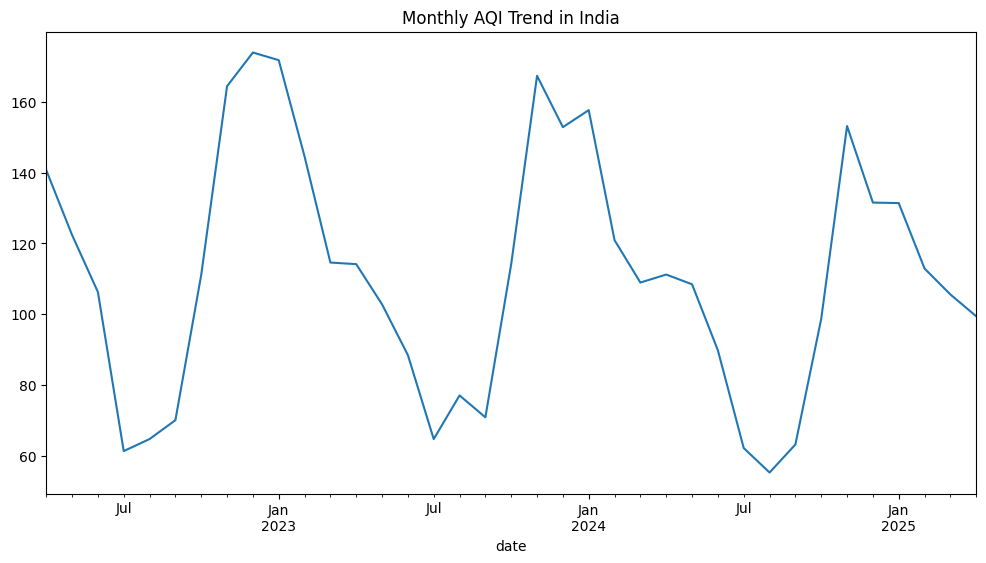

In [ ]:
# AQI Trend Over Time
monthly_trend = df.groupby(df['date'].dt.to_period('M'))['aqi_value'].mean()
monthly_trend.plot(kind='line', figsize=(12,6), title="Monthly AQI Trend in India")

**Answer:**


* AQI peaks Nov–Jan (winter smog)
* Slightly better during monsoon (July–Sept)
* Long-term trend shows gradual worsening





**Which cities are the worst AQI hotspots?**

In [ ]:
#AQI by cities
city_aqi=df.groupby('area')['aqi_value'].mean().sort_values(ascending=False).head(10)
city_aqi

,aqi_value
area,
Byrnihat,239.995427
Begusarai,206.680412
Delhi,206.416889
Greater Noida,201.601959
Sri Ganganagar,197.939351
Gurugram,190.848214
Darbhanga,190.089844
Dharuhera,185.722513
NOIDA,183.989324


**Answer:**
begusarai, Delhi, Noida, Gurugram are among the top worst cities
*AQI issues are concentrated in North India*

**How does AQI vary by season?**

<Axes: title={'center': 'Average AQI by Month'}, xlabel='month'>

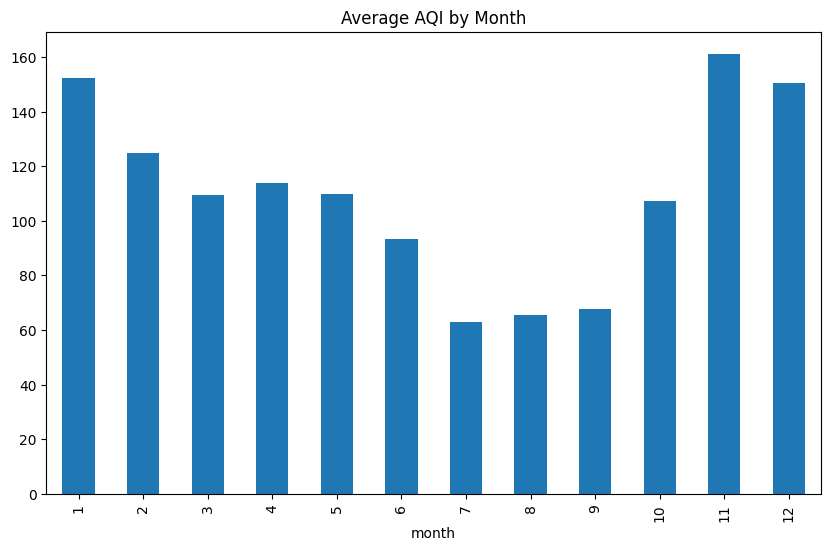

In [ ]:
# average AQI by month
df['month'] = df['date'].dt.month
seasonal = df.groupby('month')['aqi_value'].mean()
seasonal.plot(kind='bar', title="Average AQI by Month", figsize=(10,6))




**Answer:**


*   Nov–Jan → Worst AQI (stubble burning + winter fog)
*   Jul–Sep → Best AQI (rainfall clears pollutants)



**Do certain pollutants correlate strongly with high AQI values?**

In [ ]:
# Prominent pollutants
df.groupby('prominent_pollutants')['aqi_value'].mean().sort_values(ascending=False)

,aqi_value
prominent_pollutants,
PM2.5,167.844696
"PM2.5,PM10",129.880521
"O3,PM2.5,PM10",119.869480
"PM2.5,O3",117.540709
"PM2.5,NO2",110.077108
"PM10,NO2,PM2.5,O3",106.372093
"PM10,O3",96.741185
PM10,93.674300
"PM2.5,SO2",93.622302


**Answer:**
* PM2.5 and PM10 → strongest link with high AQ
* O3 and CO → moderate AQI impac
* SO2 → least impactful



**Heatmap:**
**Correlation between AQI value and pollutants**

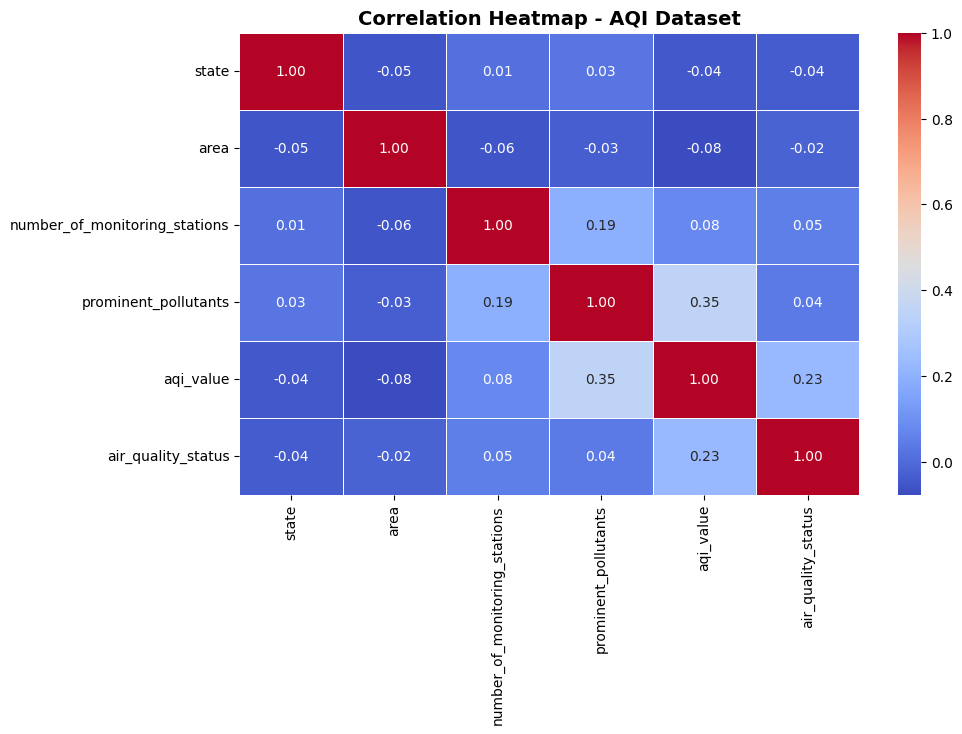

In [ ]:
# coreelation heatmap
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Optional: drop unused column
if 'note' in df.columns:
    df = df.drop(columns=['note'])

# Encode categorical columns for correlation (pollutant, status, state)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['state', 'area', 'prominent_pollutants', 'air_quality_status']:
    df[col] = le.fit_transform(df[col].astype(str))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - AQI Dataset", fontsize=14, fontweight='bold')
plt.show()